In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
#clean arr global memory stored
for name in dir():
    if not name.startswith('_'):
        del globals()[name]

%reset -f


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('MyDrive/tampung/apotekobat1.csv', na_values=['-'])
print('he-yooo', df.head())
df['Tgl'] = pd.to_datetime(df['Tgl'], dayfirst=True)

df.sort_values('Tgl', inplace=True)

df = df.fillna(0)
df['Obat_Masuk'] = df['Obat_Masuk'].astype(str).astype('float32')
df['Obat_Keluar'] = df['Obat_Keluar'].astype(str).astype('float32')
df['Harga'] = df['Harga'].astype(str).astype('float32')
df['Stok_Obat'] = df['Stok_Obat'].astype(str).astype('float32')

df.info()


he-yooo           Tgl   Nama_Obat    Golongan  ...    Harga  Stok_Obat     Terjual
0  29/11/2019     MERTIGO  Obat Keras  ...  56000.0      186.0  Tidak Laku
1  30/11/2019     MERTIGO  Obat Keras  ...  56000.0      160.0  Tidak Laku
2  23/12/2019     MERTIGO  Obat Keras  ...  56000.0       95.0  Tidak Laku
3  01/01/2020  OMEPRAZOLE  Obat Bebas  ...   5000.0       39.0        Laku
4  02/01/2020  OMEPRAZOLE  Obat Bebas  ...   5000.0      119.0        Laku

[5 rows x 13 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13890 entries, 0 to 13889
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tgl           13890 non-null  datetime64[ns]
 1   Nama_Obat     13890 non-null  object        
 2   Golongan      13890 non-null  object        
 3   Pabrik        13890 non-null  object        
 4   No_Batch      13890 non-null  float64       
 5   Dengan_Resep  13890 non-null  object        
 6   Tgl_E

In [ ]:
df.dtypes

Tgl             datetime64[ns]
Nama_Obat               object
Golongan                object
Pabrik                  object
No_Batch               float64
Dengan_Resep            object
Tgl_ED                  object
Promo                   object
Obat_Masuk             float32
Obat_Keluar            float32
Harga                  float32
Stok_Obat              float32
Terjual                 object
dtype: object

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)


In [ ]:
""" untuk data yang hilang atau istilah missing value terdapat beberapa atribut seperti :No_Batch, Tgl_ED, Promo, Obat_Masuk, Obat_Keluar"""
df.isnull().sum()


Tgl                 0
Nama_Obat           0
Golongan            0
Pabrik           1252
No_Batch        13652
Dengan_Resep        0
Tgl_ED          13652
Promo           13652
Obat_Masuk          0
Obat_Keluar         0
Harga               0
Stok_Obat           0
Terjual             0
dtype: int64

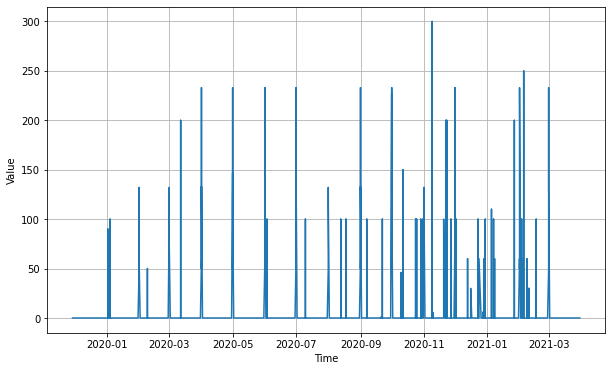

In [ ]:
#print(df.Obat_Masuk.value_counts())
plt.figure(figsize=(10, 6))
plot_series(df.Tgl, df.Obat_Masuk)
plt.show()

In [ ]:
dfx = df.drop(columns = ['Tgl', 'Pabrik', 'No_Batch', 'Harga', 'Dengan_Resep', 'Tgl_ED', 'Promo'])
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13890 entries, 0 to 13889
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nama_Obat    13890 non-null  object 
 1   Golongan     13890 non-null  object 
 2   Obat_Masuk   13890 non-null  float32
 3   Obat_Keluar  13890 non-null  float32
 4   Stok_Obat    13890 non-null  float32
 5   Terjual      13890 non-null  object 
dtypes: float32(3), object(3)
memory usage: 596.8+ KB


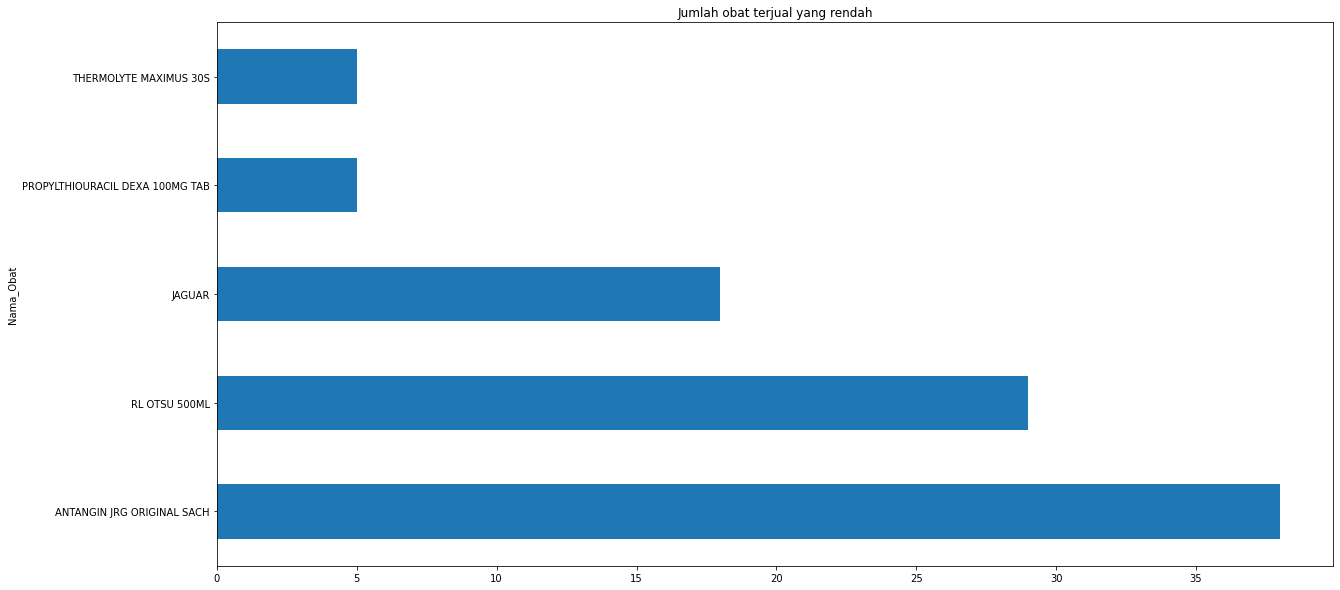

In [ ]:
dfx.groupby('Nama_Obat')['Obat_Keluar'].sum().sort_values(ascending=False).tail(5).plot(kind='barh', figsize=(20,10))
plt.title('Jumlah obat terjual yang rendah')
plt.show()


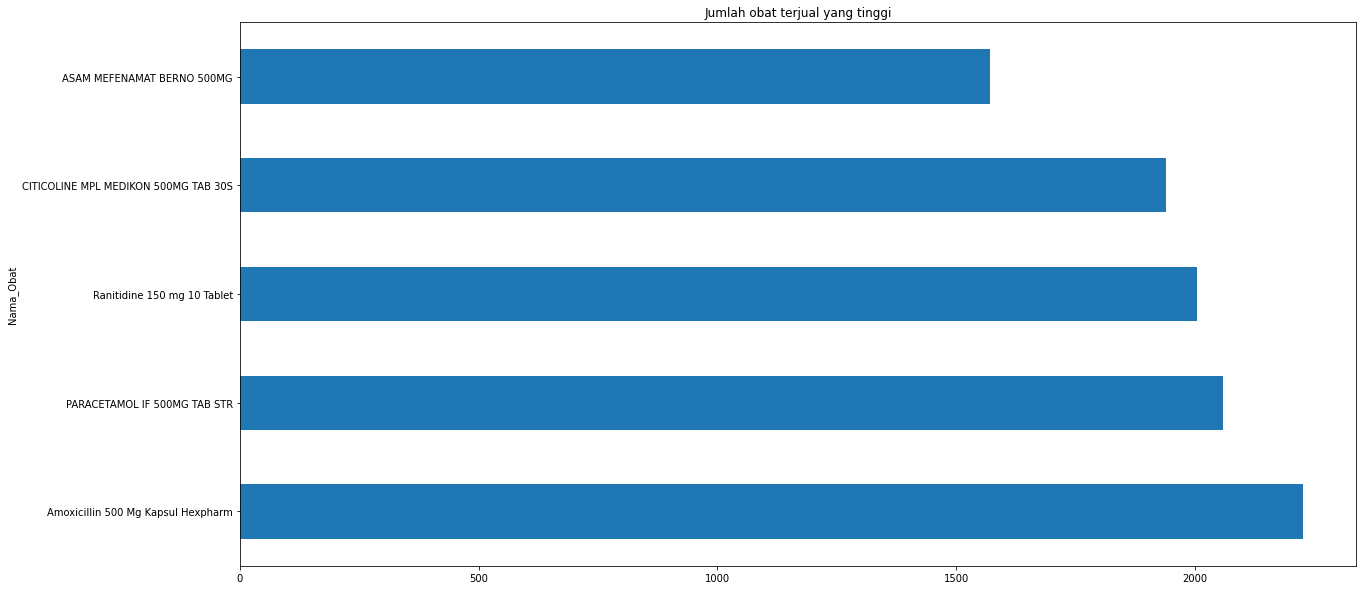

In [ ]:
dfx.groupby('Nama_Obat')['Obat_Keluar'].sum().sort_values(ascending=False).head(5).plot(kind='barh', figsize=(20,10))
plt.title('Jumlah obat terjual yang tinggi')
plt.show()


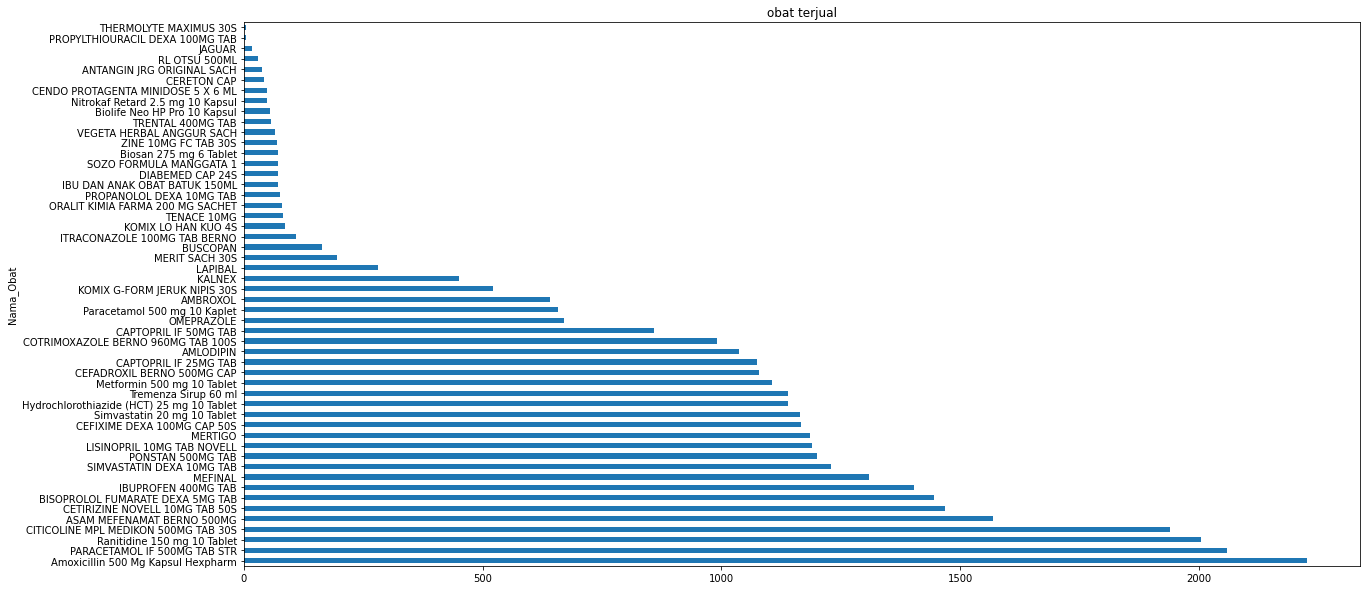

In [ ]:
#obat yang terjual berdasarkan nama

dfx.groupby('Nama_Obat')['Obat_Keluar'].sum().sort_values(ascending=False).plot(kind='barh', figsize=(20,10))
plt.title('obat terjual')
plt.show()



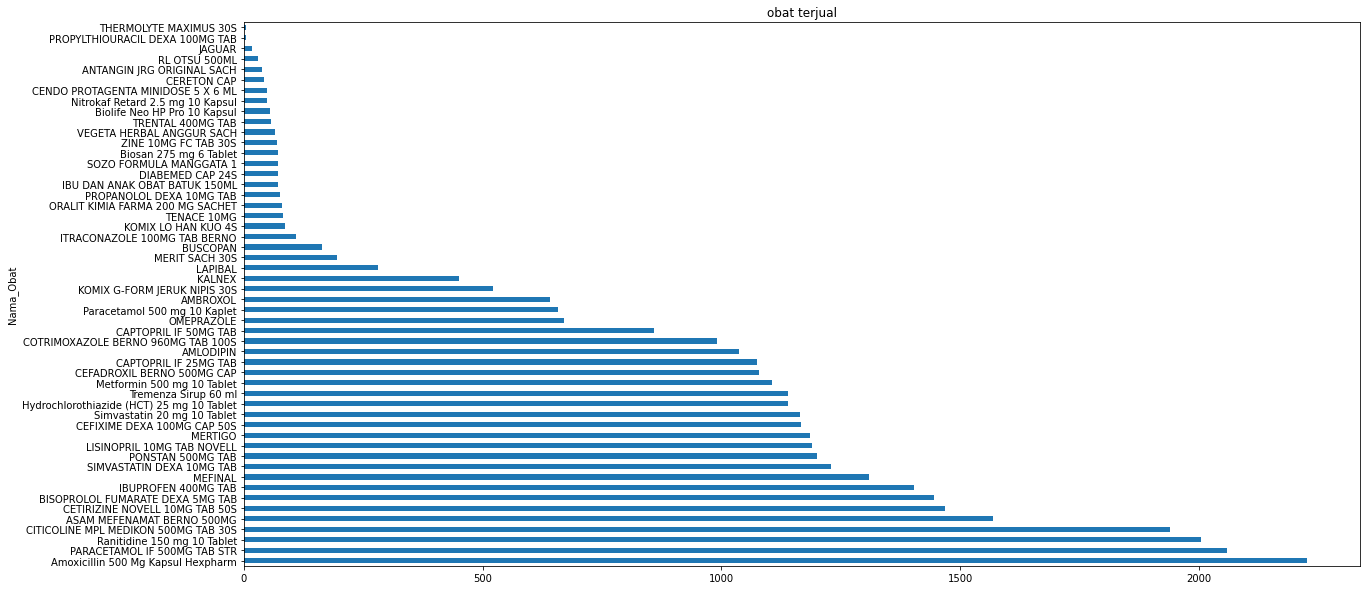

In [ ]:

"""
total_sale_cat1 = dfx.groupby('Nama_Obat').agg({'Stok_Obat':'sum','Obat_Keluar':'sum'}).reset_index().sort_values('Obat_Keluar',ascending =False)
ttc1 = total_sale_cat1.head(50)
ttc1['best_laku'] = ttc1['Stok_Obat']/ttc1['Obat_Keluar']
print(ttc1)
print(ttc1.describe())
"""

dfx.groupby('Nama_Obat')['Obat_Keluar'].sum().sort_values(ascending=False).plot(kind='barh', figsize=(20,10))
plt.title('obat terjual')
plt.show()

In [ ]:
"""laku"""
print('laku:')
plt.figure(figsize=(10, 6))
plot_series(df[df['Nama_Obat']=='Amoxicillin 500 Mg Kapsul Hexpharm'].Tgl, df[df['Nama_Obat']=='Amoxicillin 500 Mg Kapsul Hexpharm'].Obat_Keluar)
plt.show()

plt.figure(figsize=(10, 6))
plot_series(df[df['Nama_Obat']=='PARACETAMOL IF 500MG TAB STR'].Tgl, df[df['Nama_Obat']=='PARACETAMOL IF 500MG TAB STR'].Obat_Keluar)
plt.show()

plt.figure(figsize=(10, 6))
plot_series(df[df['Nama_Obat']=='Ranitidine 150 mg 10 Tablet'].Tgl, df[df['Nama_Obat']=='Ranitidine 150 mg 10 Tablet'].Obat_Keluar)
plt.show()

plt.figure(figsize=(10, 6))
plot_series(df[df['Nama_Obat']=='MEFINAL'].Tgl, df[df['Nama_Obat']=='MEFINAL'].Obat_Keluar)
plt.show()

plt.figure(figsize=(10, 6))
plot_series(df[df['Nama_Obat']=='CAPTOPRIL IF 50MG TAB'].Tgl, df[df['Nama_Obat']=='CAPTOPRIL IF 50MG TAB'].Obat_Keluar)
plt.show()

"""tidak"""
print('\n','tidak:')
plt.figure(figsize=(10, 6))
plot_series(df[df['Nama_Obat']=='THERMOLYTE MAXIMUS 30S'].Tgl, df[df['Nama_Obat']=='THERMOLYTE MAXIMUS 30S'].Obat_Keluar)
plt.show()

plt.figure(figsize=(10, 6))
plot_series(df[df['Nama_Obat']=='PROPYLTHIOURACIL DEXA 100MG TAB'].Tgl, df[df['Nama_Obat']=='PROPYLTHIOURACIL DEXA 100MG TAB'].Obat_Keluar)
plt.show()

plt.figure(figsize=(10, 6))
plot_series(df[df['Nama_Obat']=='JAGUAR'].Tgl, df[df['Nama_Obat']=='JAGUAR'].Obat_Keluar)
plt.show()

plt.figure(figsize=(10, 6))
plot_series(df[df['Nama_Obat']=='RL OTSU 500ML'].Tgl, df[df['Nama_Obat']=='RL OTSU 500ML'].Obat_Keluar)
plt.show()

plt.figure(figsize=(10, 6))
plot_series(df[df['Nama_Obat']=='BUSCOPAN'].Tgl, df[df['Nama_Obat']=='BUSCOPAN'].Obat_Keluar)
plt.show()


Proporsi Obat yang sering Laku dan Tidak : %50.410367170626344


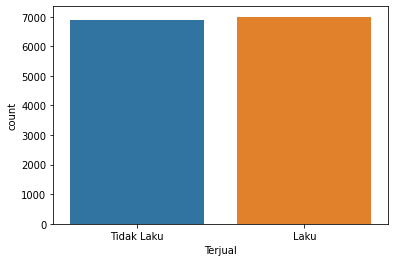

In [ ]:
""" perbandingan data antara Terjual & tidak  sperti d bawha ini """

sns.countplot(x="Terjual", data=df)
print("Proporsi Obat yang sering Laku dan Tidak : %{}".format(df['Terjual'].map({'Laku' : 1 , 'Tidak Laku' : 0}).sum() / len(df) *100))


In [ ]:
#data = dfx.drop(['filename'],axis=1) # hapus filename
CL = dfx['Nama_Obat']
encoder = LabelEncoder()
y = encoder.fit_transform(CL)

scaler = StandardScaler()
X = scaler.fit_transform(dfx.iloc[:, -4:5])
X.shape


(13890, 3)

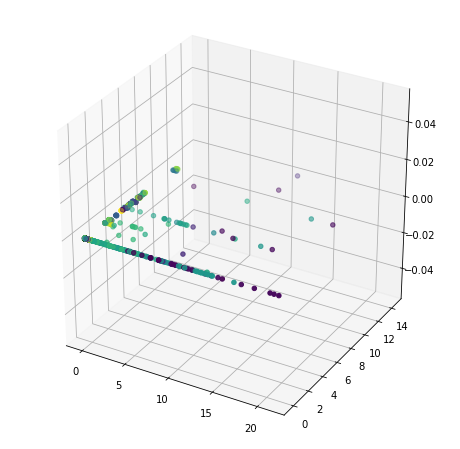

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,2], X[:,0], c=y.astype(np.float))

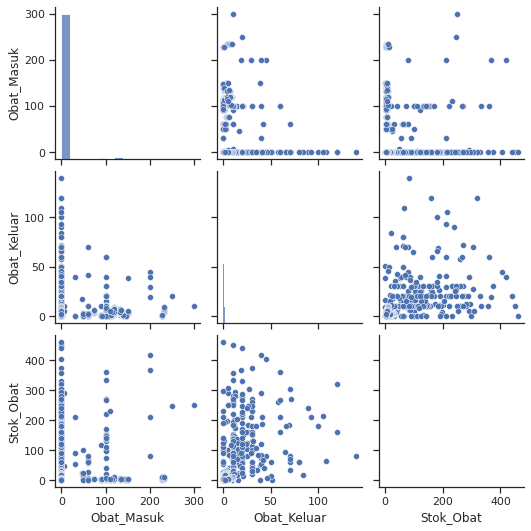

In [ ]:

sns.set_theme(style="ticks")
sns.pairplot(dfx)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


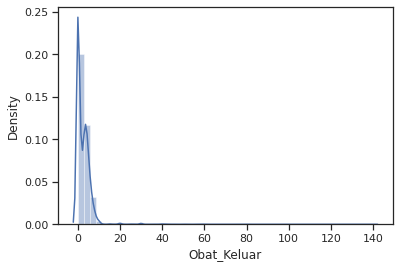

In [ ]:
""" untuk Histogram penjualan Obat yang keluar  """
sns.distplot(dfx["Obat_Keluar"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


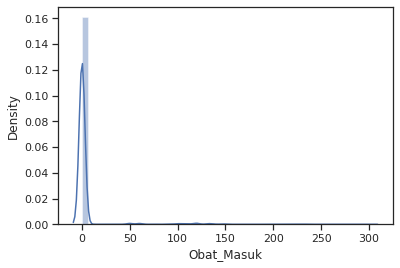

In [ ]:
""" untuk Histogram penjualan Obat yang keluar  """
sns.distplot(dfx["Obat_Masuk"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


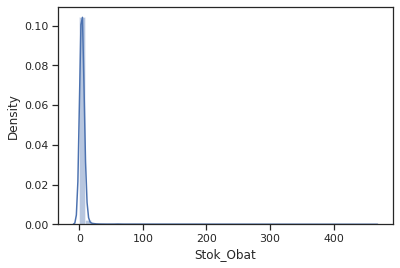

In [ ]:
""" untuk Histogram penjualan Obat yang keluar  """
sns.distplot(dfx["Stok_Obat"])

#**simples otLiar remoben :**


In [ ]:
print('oatlier di obat masok :', dfx[dfx["Obat_Masuk"] >= 190].shape ,'\n')
print('oatlier di stok obat :', dfx[dfx["Stok_Obat"] >= 200].shape ,'\n')
print('oatlier di obat keloar :', dfx[dfx["Obat_Keluar"] >= 60].shape ,'\n')

oatlier di obat masok : (24, 6) 

oatlier di stok obat : (56, 6) 

oatlier di obat keloar : (24, 6) 



In [ ]:
dfx = dfx[dfx["Obat_Masuk"] < 190]
dfx = dfx[dfx["Stok_Obat"] < 200]
dfx = dfx[dfx["Obat_Keluar"] < 140]

dfx.shape 

(13814, 6)

In [ ]:
CL = dfx['Golongan']
encoder = LabelEncoder()
y = encoder.fit_transform(CL)

scaler = StandardScaler()
X = scaler.fit_transform(dfx.iloc[:, -4:5])
X.shape


(13814, 3)

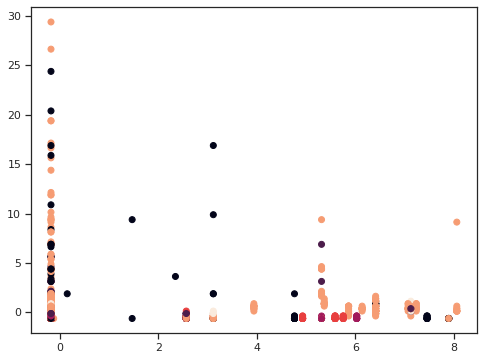

In [ ]:
#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


%matplotlib inline

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()


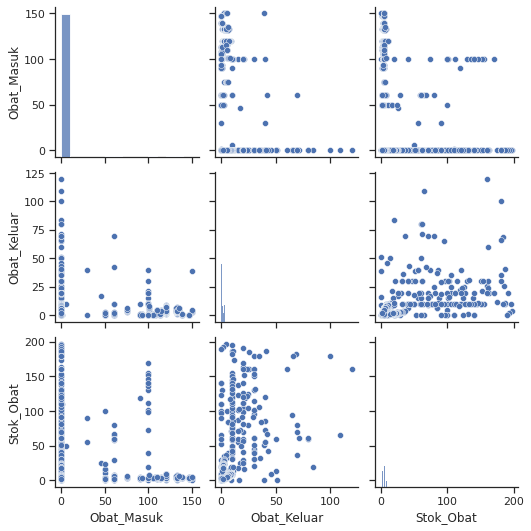

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(dfx)


In [ ]:
"""

dfx.groupby('Golongan')['Obat_Keluar'].sum().sort_values(ascending=False).plot(kind='barh', figsize=(20,10))
plt.title('obat terjual')
plt.show()

total_sale_cat1 = dfx.groupby('Golongan').agg({'Obat_Masuk':'sum','Obat_Keluar':'sum'}).reset_index().sort_values('Obat_Keluar',ascending =False)
ttc1 = total_sale_cat1
ttc1['best_laku'] = ttc1['Obat_Masuk']/ttc1['Obat_Keluar']
print(ttc1)
print(ttc1.describe())
"""

In [ ]:
#dfx[dfx['Nama_Obat'] == 'IBU DAN ANAK OBAT BATUK 150ML'].tail()

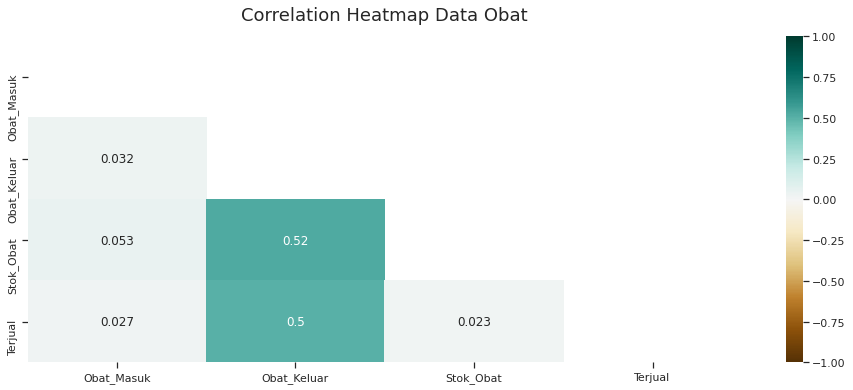

In [ ]:
#dfx = df.drop(columns = [ 'Golongan', 'Pabrik', 'No_Batch', 'Harga', 'Dengan_Resep', 'Tgl_ED', 'Promo'])
dfx['Terjual'] = dfx['Terjual'].map({'Laku' : 1 , 'Tidak Laku' : 0})

""" Untuk memastikan atribut data tidak ada yang identik atau kembar maka kolerasi seluruh atribut data  seperti berikut""" 
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(dfx.corr(), dtype=np.bool))
heatmap = sns.heatmap(dfx.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap Data Obat', fontdict={'fontsize':18}, pad=16);

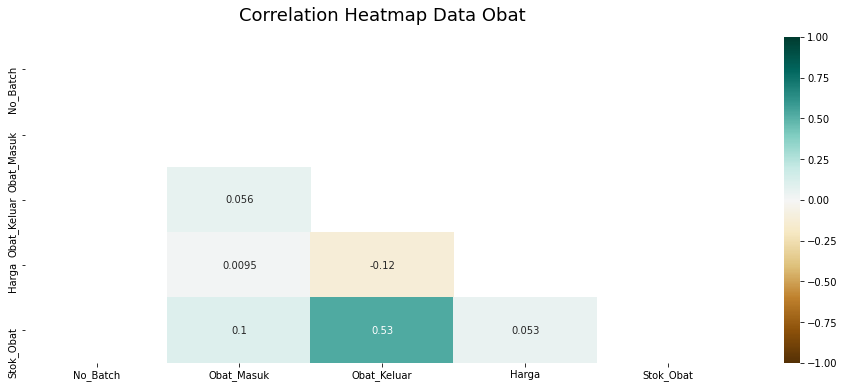

In [ ]:
""" Untuk memastikan atribut data tidak ada yang identik atau kembar maka kolerasi seluruh atribut data  seperti berikut""" 
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap Data Obat', fontdict={'fontsize':18}, pad=16);

In [ ]:
dfx.head()

,Tgl,Nama_Obat,Obat_Masuk,Obat_Keluar,Stok_Obat,Terjual
0,2019-11-29,MERTIGO,0.0,10.0,186.0,0
1,2019-11-30,MERTIGO,0.0,26.0,160.0,0
3,2020-01-01,OMEPRAZOLE,0.0,10.0,39.0,1
28,2020-01-02,TRENTAL 400MG TAB,0.0,0.0,5.0,0
27,2020-01-02,CERETON CAP,0.0,0.0,3.0,0


##**testing:**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import gc
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, LabelBinarizer, OrdinalEncoder
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#dfx.drop('Tgl', axis=1, inplace=True)
treget = dfx['Terjual']
dfx.drop('Terjual', axis=1, inplace=True)


In [ ]:
#ordinal_encoder + standarscaler

col_transformer2 = ColumnTransformer(
                    transformers=[
                        ("OrE", OrdinalEncoder(), ['Nama_Obat','Golongan']),
                        ("Ss", StandardScaler(), ['Obat_Masuk','Obat_Keluar','Stok_Obat'])
                    ],
                    remainder='passthrough',
                    n_jobs=-1
                    )

featurore = col_transformer2.fit_transform(dfx)
featurore = pd.DataFrame(featurore)
featurore

,0,1,2,3,4
0,31.0,4.0,-0.1729,1.886009,15.648874
1,31.0,4.0,-0.1729,5.884179,13.395542
2,31.0,4.0,-0.1729,15.629720,7.762213
3,34.0,0.0,-0.1729,1.886009,2.908883
4,48.0,4.0,-0.1729,-0.612848,-0.037781
...,...,...,...,...,...
13809,45.0,5.0,-0.1729,0.886466,0.048886
13810,8.0,2.0,-0.1729,-0.362962,-0.124448
13811,15.0,4.0,-0.1729,0.636581,-0.037781
13812,3.0,4.0,-0.1729,0.636581,-0.037781


In [ ]:
X = featurore
Y = treget

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.5)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifierLR = LogisticRegression(random_state = 0)
classifierLR.fit(X_train, y_train)

# KNearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifierKNN.fit(X_train, y_train)
# SVM GAUSSIAN
from sklearn.svm import SVC
classifierSVM = SVC(kernel = 'rbf', random_state = 0)
classifierSVM.fit(X_train, y_train)
#Naive bayes
from sklearn.naive_bayes import GaussianNB
classifierNB = GaussianNB()
classifierNB.fit(X_train, y_train)
#predict & confusion matrix ordinal+standardscaler
# Prediction y_pred
y_pred_LR = classifierLR.predict(X_test)
y_pred_KNN = classifierKNN.predict(X_test)
y_pred_SVM = classifierSVM.predict(X_test)
y_pred_NB = classifierNB.predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm_logreg = confusion_matrix(y_test, y_pred_LR)
as_logreg=accuracy_score(y_test, y_pred_LR)

cm_knn = confusion_matrix(y_test, y_pred_KNN)
as_knn=accuracy_score(y_test, y_pred_KNN)

cm_svm_gaussian = confusion_matrix(y_test, y_pred_SVM)
as_svm_gaussian = accuracy_score(y_test, y_pred_SVM)

cm_nb = confusion_matrix(y_test, y_pred_NB)
as_nb = accuracy_score(y_test, y_pred_NB)

# Find best Classifier
score={'as_logreg':as_logreg, 'as_knn':as_knn, 'as_svm_gaussian':as_svm_gaussian, 'as_nb':as_nb}
score_list=[]
for i in score:
    score_list.append(score[i])
    u=max(score_list)
    if score[i]==u:
        v=i  
    print(f"{i}={score[i]}");   
print(f"The best method to use in this case is {v} with accuracy score {u}")

as_logreg=0.9830606630954104
as_knn=0.9949326769943535
as_svm_gaussian=0.9630809323874331
as_nb=0.8838859128420443
The best method to use in this case is as_knn with accuracy score 0.9949326769943535


#**outlier remove!!!**

with:

1). holding Golongan obat as atribut or else i fg

2). these ar how  the otLiar remoben: 

      dfx = dfx[dfx["Obat_Masuk"] < 190]
      dfx = dfx[dfx["Stok_Obat"] < 200]
      dfx = dfx[dfx["Obat_Keluar"] < 140]
  shape become abot (13814, col)

#**logis reg confus Matrix :**

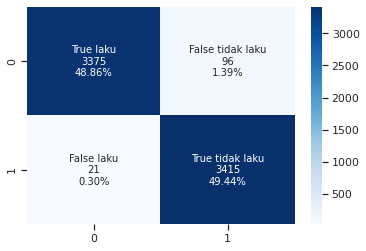

In [ ]:
group_names = ['True laku','False tidak laku','False laku','True tidak laku']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_logreg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_logreg.flatten()/np.sum(cm_logreg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_logreg, annot=labels, fmt='', cmap='Blues')

#**knn conbus Matrix :**

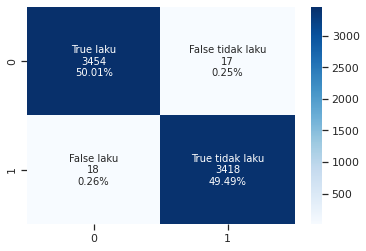

In [ ]:
group_names = ['True laku','False tidak laku','False laku','True tidak laku']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_knn.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_knn.flatten()/np.sum(cm_knn)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_knn, annot=labels, fmt='', cmap='Blues')

#**svm conpus Matrix :**

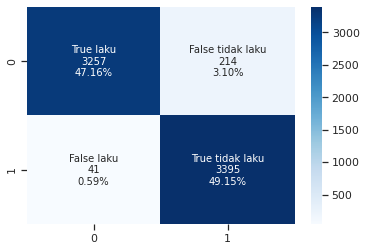

In [ ]:
group_names = ['True laku','False tidak laku','False laku','True tidak laku']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_svm_gaussian.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_svm_gaussian.flatten()/np.sum(cm_svm_gaussian)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_svm_gaussian, annot=labels, fmt='', cmap='Blues')

#**naibe confus Matrix :**

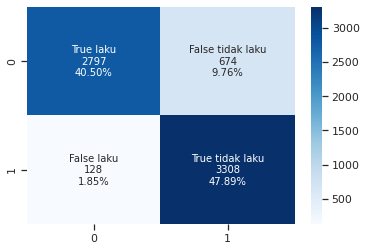

In [ ]:
group_names = ['True laku','False tidak laku','False laku','True tidak laku']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_nb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_nb.flatten()/np.sum(cm_nb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_nb, annot=labels, fmt='', cmap='Blues')

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [ ]:
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()